# SVM for classification

Load IRIS dataset, check its contents:


In [9]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [10]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [11]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [12]:
mask = (y != 2)
X_2features = X[mask][:, :2]
y_2features = y[mask]

print(f"Shape of X with two features and two classes: {X_2features.shape}")
print(f"Shape of y with two classes: {y_2features.shape}")

Shape of X with two features and two classes: (100, 2)
Shape of y with two classes: (100,)


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

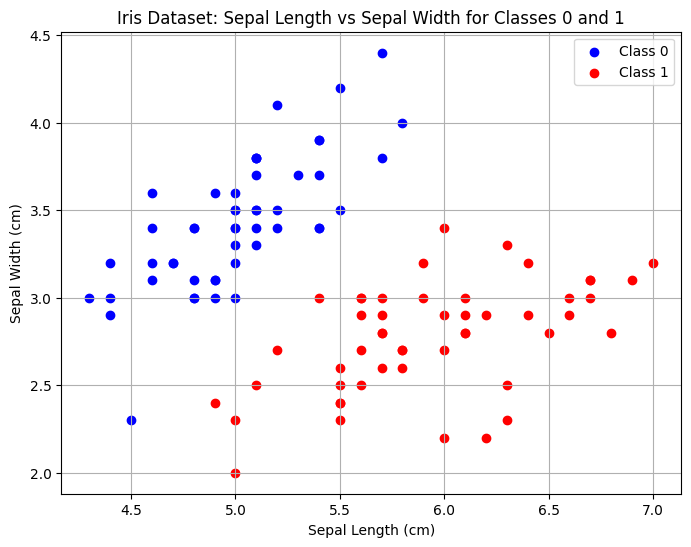

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_2features[y_2features == 0, 0], X_2features[y_2features == 0, 1], label='Class 0', c='blue')
plt.scatter(X_2features[y_2features == 1, 0], X_2features[y_2features == 1, 1], label='Class 1', c='red')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Length vs Sepal Width for Classes 0 and 1')
plt.legend()
plt.grid(True)
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [14]:
from sklearn.svm import SVC

X_train_2features, X_test_2features, y_train_2features, y_test_2features = train_test_split(X_2features, y_2features, test_size=0.2, random_state=42)

SVMmodel_2features = SVC(kernel='linear', C=200) # Using C=200 as suggested
SVMmodel_2features.fit(X_train_2features, y_train_2features)

print(f"Model parameters: {SVMmodel_2features.get_params()}")
print(f"Training accuracy: {SVMmodel_2features.score(X_train_2features, y_train_2features):.2f}")
print(f"Test accuracy: {SVMmodel_2features.score(X_test_2features, y_test_2features):.2f}")

Model parameters: {'C': 200, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Training accuracy: 1.00
Test accuracy: 1.00


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

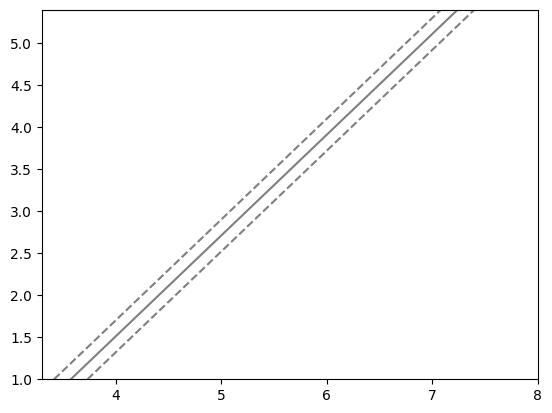

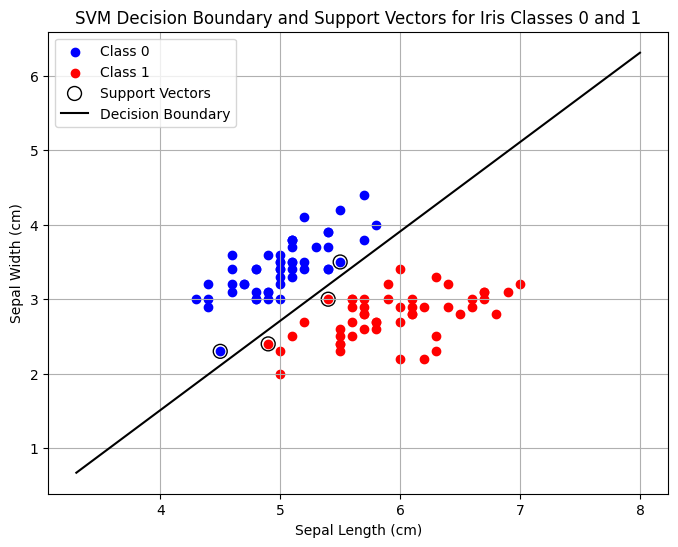

In [15]:
import numpy as np
import matplotlib.pyplot as plt

supvectors = SVMmodel_2features.support_vectors_

# Get the separating hyperplane coefficients
W = SVMmodel_2features.coef_[0]
b = SVMmodel_2features.intercept_[0]

# Create a mesh to plot the decision boundary
ax = plt.gca()
x_min, x_max = X_2features[:, 0].min() - 1, X_2features[:, 0].max() + 1
y_min, y_max = X_2features[:, 1].min() - 1, X_2features[:, 1].max() + 1
xx = np.linspace(x_min, x_max, 30)
yy = np.linspace(y_min, y_max, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([[XX.ravel(), YY.ravel()]]).T
Z = SVMmodel_2features.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_2features[y_2features == 0, 0], X_2features[y_2features == 0, 1], label='Class 0', c='blue')
plt.scatter(X_2features[y_2features == 1, 0], X_2features[y_2features == 1, 1], label='Class 1', c='red')

# Plot support vectors
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

# Plot the decision line
def f(x, w, b): return (-w[0] * x - b) / w[1]
plt.plot(xx, f(xx, W, b), 'k-', label='Decision Boundary')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('SVM Decision Boundary and Support Vectors for Iris Classes 0 and 1')
plt.legend()
plt.grid(True)
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

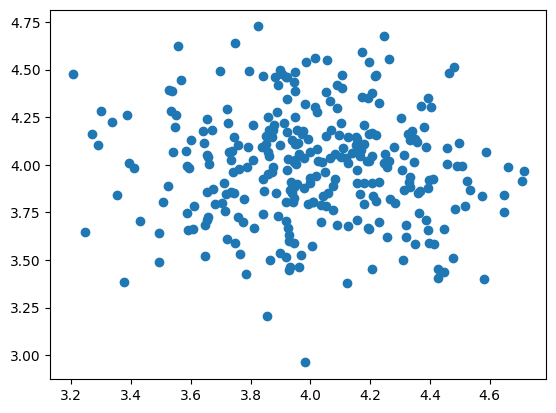

In [16]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

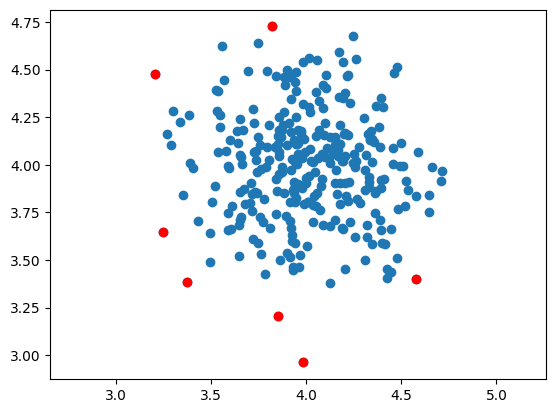

In [17]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


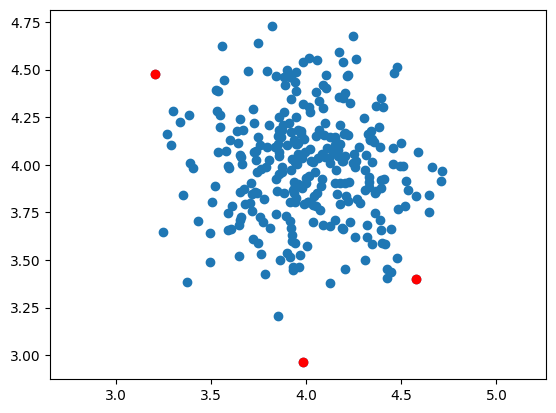

In [18]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()